In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('../')
import evaluation
reload(evaluation)
from evaluation import get_anomaly_metrics

# Sample generation

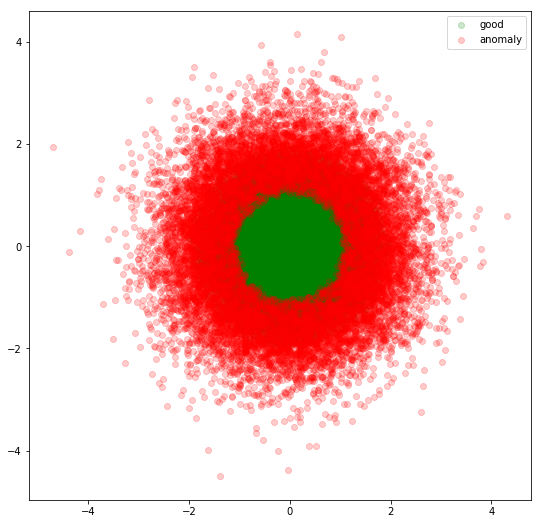

In [48]:
X_data = np.random.normal(size=(40240, 2))
r = np.sqrt(X_data[:, 0] ** 2 + X_data[:, 1] ** 2)
labels = 1 - np.random.binomial(1, p=1 - np.minimum(np.maximum(r - 1, 0), 1))

plt.figure(figsize=(9, 9))
plt.scatter(X_data[labels == 0, 0], X_data[labels == 0, 1], color='green', alpha=0.2, label='good')
plt.scatter(X_data[labels == 1, 0], X_data[labels == 1, 1], color='red', alpha=0.2, label='anomaly')
plt.legend()
plt.show()

# Utils

In [49]:
def plot_decision_boundary(predict_fn, title=None, alpha=0.005):
    x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    fig, ax = plt.subplots()

    Z = predict_fn(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X_data[:, 0], X_data[:, 1], c=labels, s=20, edgecolor='k', alpha=alpha)
    if not title is None: ax.set_title(title)

    plt.show()

# Train-test split

In [50]:
from sklearn.model_selection import train_test_split
import numpy as np
indx_train, indx_test = train_test_split(np.arange(len(labels), dtype='int32'), stratify=labels, train_size=0.5, test_size=0.5)

In [51]:
y_train = labels[indx_train]
y_test = labels[indx_test]

X_train = X_data[indx_train]
X_test = X_data[indx_test]

In [52]:
X_good = X_train[np.where(y_train==0)[0]]
X_bad = X_train[np.where(y_train==1)[0]]

In [53]:
X_good.shape, X_bad.shape, X_train.shape, X_data.shape

((13254, 2), (6866, 2), (20120, 2), (40240, 2))

In [54]:
CONTAMINATION = 1e-2
bad_cnt = int(CONTAMINATION * X_good.shape[0])
X_mix = np.vstack([X_train[y_train == 0], X_train[y_train == 1][:bad_cnt]])
y_mix = np.concatenate([np.zeros_like(y_train[y_train == 0]), np.ones_like(y_train[y_train == 1][:bad_cnt])])

# One plus e NN

In [55]:
# import ope_estimator; reload(ope_estimator) # For source update
from ope_estimator import OPE

clf = OPE(pseudo_neg_size=10000, batch_size=10000, alpha=None, verbose=2, epoches=100, lr=5e-4, hidden_layer_size=50)
clf.fit(X_mix, y_mix)

{'Precision@0.9': 0.9908033746294748, 'Precision@0.8': 0.9908033746294748, 'PR_AUC': 0.8566463225695994, 'Precision@0.95': 0.9905653313365781, 'P@10': 1.0, 'Precision@0.99': 0.9902129249159507, 'ROC_AUC': 0.681388923183853}
{'Precision@0.9': 0.9906829964685551, 'Precision@0.8': 0.9906829964685551, 'PR_AUC': 0.8554115715189036, 'Precision@0.95': 0.9905433803662563, 'P@10': 1.0, 'Precision@0.99': 0.9902121936640765, 'ROC_AUC': 0.7075679840505553}
{'Precision@0.9': 0.9906527966229459, 'Precision@0.8': 0.9906527966229459, 'PR_AUC': 0.8548552821505098, 'Precision@0.95': 0.9905334335086401, 'P@10': 1.0, 'Precision@0.99': 0.9902129249159507, 'ROC_AUC': 0.7284296107292939}
{'Precision@0.9': 0.9905180914814534, 'Precision@0.8': 0.9905180914814534, 'PR_AUC': 0.8541211496190217, 'Precision@0.95': 0.9904697072838666, 'P@10': 1.0, 'Precision@0.99': 0.9902129249159507, 'ROC_AUC': 0.7471803823659868}
{'Precision@0.9': 0.9904182509505703, 'Precision@0.8': 0.9904182509505703, 'PR_AUC': 0.85198419809217

{'Precision@0.9': 0.9833248472505092, 'Precision@0.8': 0.9833248472505092, 'PR_AUC': 0.6018713632039918, 'Precision@0.95': 0.9833248472505092, 'P@10': 1.0, 'Precision@0.99': 0.9833248472505092, 'ROC_AUC': 0.9320102336172955}
{'Precision@0.9': 0.9823592782116887, 'Precision@0.8': 0.9823592782116887, 'PR_AUC': 0.5890110281708836, 'Precision@0.95': 0.9823592782116887, 'P@10': 1.0, 'Precision@0.99': 0.9823592782116887, 'ROC_AUC': 0.9378095120512504}
{'Precision@0.9': 0.9823972050524052, 'Precision@0.8': 0.9823972050524052, 'PR_AUC': 0.6039905860585737, 'Precision@0.95': 0.9823972050524052, 'P@10': 1.0, 'Precision@0.99': 0.9823972050524052, 'ROC_AUC': 0.940635131303986}
{'Precision@0.9': 0.9834679454820797, 'Precision@0.8': 0.9834679454820797, 'PR_AUC': 0.5963365932375629, 'Precision@0.95': 0.9834679454820797, 'P@10': 1.0, 'Precision@0.99': 0.9834679454820797, 'ROC_AUC': 0.937647754137116}
{'Precision@0.9': 0.9822949047168537, 'Precision@0.8': 0.9822949047168537, 'PR_AUC': 0.626811350515733

{'Precision@0.9': 0.9736365465888509, 'Precision@0.8': 0.9736365465888509, 'PR_AUC': 0.5110342879930024, 'Precision@0.95': 0.9736365465888509, 'P@10': 1.0, 'Precision@0.99': 0.9736365465888509, 'ROC_AUC': 0.9559172531105531}
{'Precision@0.9': 0.975231612781244, 'Precision@0.8': 0.975231612781244, 'PR_AUC': 0.5015482772028321, 'Precision@0.95': 0.975231612781244, 'P@10': 1.0, 'Precision@0.99': 0.975231612781244, 'ROC_AUC': 0.9534125775637772}
{'Precision@0.9': 0.9715711805555556, 'Precision@0.8': 0.9715711805555556, 'PR_AUC': 0.5021586407362666, 'Precision@0.95': 0.9715711805555556, 'P@10': 1.0, 'Precision@0.99': 0.9715711805555556, 'ROC_AUC': 0.9551681939357358}
{'Precision@0.9': 0.9729282909692085, 'Precision@0.8': 0.9729282909692085, 'PR_AUC': 0.5175842433363012, 'Precision@0.95': 0.9729282909692085, 'P@10': 1.0, 'Precision@0.99': 0.9729282909692085, 'ROC_AUC': 0.9551227531082669}
{'Precision@0.9': 0.9723978086809946, 'Precision@0.8': 0.9723978086809946, 'PR_AUC': 0.5174898667605266,

{'Precision@0.9': 0.5104089219330855, 'Precision@0.8': 0.5104089219330855, 'PR_AUC': 0.9207947419003798, 'Precision@0.95': 0.5104089219330855, 'P@10': 1.0, 'Precision@0.99': 0.5104089219330855, 'ROC_AUC': 0.9534306259587981}


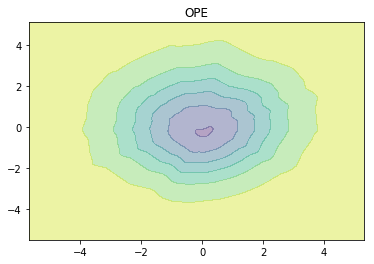

In [56]:
y_pred = clf.predict_proba(X_test)
print(get_anomaly_metrics(y_test, y_pred[:, 1]))
plot_decision_boundary(predict_fn=lambda x: clf.predict_proba(x)[:, 1], title='OPE', alpha=0)

## XGBoost

{'Precision@0.9': 0.6445985817071277, 'Precision@0.8': 0.6445985817071277, 'PR_AUC': 0.9040436593716563, 'Precision@0.95': 0.6445985817071277, 'P@10': 1.0, 'Precision@0.99': 0.6445985817071277, 'ROC_AUC': 0.93720778377926}


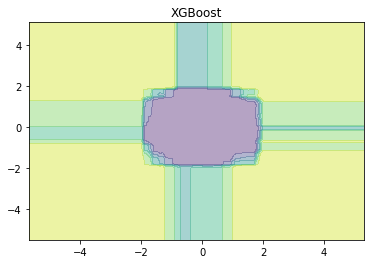

In [57]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators=1000, learning_rate=1e-2)
clf.fit(X_mix, y_mix)
y_pred = clf.predict_proba(X_test)[:, 1]
print(get_anomaly_metrics(y_test, y_pred))
plot_decision_boundary(predict_fn=lambda x: clf.predict_proba(x)[:, 1], title='XGBoost', alpha=0)

# OC-SVM

{'Precision@0.9': 0.6820006174745292, 'Precision@0.8': 0.7069931188990238, 'PR_AUC': 0.8031210972681657, 'Precision@0.95': 0.6701724225109976, 'P@10': 1.0, 'Precision@0.99': 0.66098144823459, 'ROC_AUC': 0.9549236651639739}


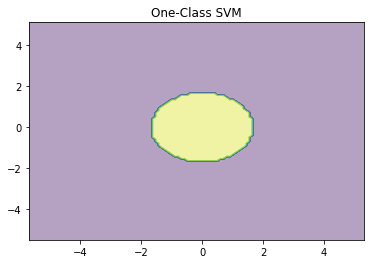

In [58]:
from sklearn import svm
clf = svm.OneClassSVM(nu=0.03, kernel="rbf", gamma=1e-5)
clf.fit(X_good) # OC-SVM is for novelty recognition
y_pred = clf.decision_function(X_test).squeeze()
print(get_anomaly_metrics(y_test, y_pred))
plot_decision_boundary(predict_fn=clf.predict, title='One-Class SVM', alpha=0)

# Isolation Forest

{'Precision@0.9': 0.6820006174745292, 'Precision@0.8': 0.7069931188990238, 'PR_AUC': 0.8029839744960169, 'Precision@0.95': 0.6701724225109976, 'P@10': 1.0, 'Precision@0.99': 0.66098144823459, 'ROC_AUC': 0.9538643473672722}


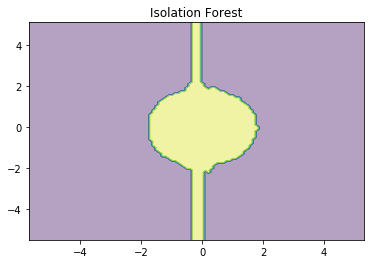

In [59]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=500, contamination=CONTAMINATION,random_state=10) # IF is for anomaly detection
clf.fit(X_mix)
y_pred = clf.decision_function(X_test).squeeze()
print(get_anomaly_metrics(y_test, y_pred))
plot_decision_boundary(predict_fn=clf.predict, title='Isolation Forest', alpha=0)

# Plots

In [47]:
fractions = [0, 1e-5, 1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.25, 1.0] # fraction of true negative samples in training sample
alphas_grid = [None, 0, 0.25, 0.5, 1]

In [61]:
from tqdm import tqdm
metrics_dict = {'XGBoost': [], 'OPE': [], 'OC-SVM': [], 'IF': []}

for fraction in tqdm(fractions):
    CONTAMINATION = fraction
    bad_cnt = int(CONTAMINATION * X_good.shape[0])
    X_mix = np.vstack([X_train[y_train == 0], X_train[y_train == 1][:bad_cnt]])
    y_mix = np.concatenate([np.zeros_like(y_train[y_train == 0]), np.ones_like(y_train[y_train == 1][:bad_cnt])])
    shuffled_idx = np.arange(X_mix.shape[0])
    np.random.shuffle(shuffled_idx)
    X_mix, y_mix = X_mix[shuffled_idx], y_mix[shuffled_idx]
    
    
    
    clf = xgb.XGBClassifier(n_estimators=1000, learning_rate=1e-2)
    clf.fit(X_mix, y_mix)
    y_pred = clf.predict_proba(X_test)[:, 1]
    metrics_dict['XGBoost'].append(get_anomaly_metrics(y_test, y_pred))
    
    clf = svm.OneClassSVM(nu=0.03, kernel="rbf", gamma=1e-5)
    clf.fit(X_good) # OC-SVM is for novelty recognition
    y_pred = clf.decision_function(X_test).squeeze()
    metrics_dict['OC-SVM'].append(get_anomaly_metrics(y_test, y_pred))
    
    clf = IsolationForest(n_estimators=500, contamination=CONTAMINATION,random_state=10) # IF is for anomaly detection
    clf.fit(X_mix)
    y_pred = clf.decision_function(X_test).squeeze()
    metrics_dict['IF'].append(get_anomaly_metrics(y_test, y_pred))

    metrics_ope = []
    for alpha in alphas_grid:
        clf = OPE(pseudo_neg_size=10000, batch_size=10000, alpha=alpha, verbose=0, 
                  epoches=100, lr=5e-4, hidden_layer_size=50)
        clf.fit(X_mix, y_mix)
        y_pred = clf.predict_proba(X_test)
        metrics_ope.append(get_anomaly_metrics(y_test, y_pred[:, 1]))
    metrics_dict['OPE'].append(metrics_ope)

100%|██████████| 10/10 [42:45<00:00, 256.53s/it]


In [63]:
import json

with open('metrics_29.05.2018.json', 'w') as f:
    f.write(json.dumps(metrics_dict, indent=4, sort_keys=False))

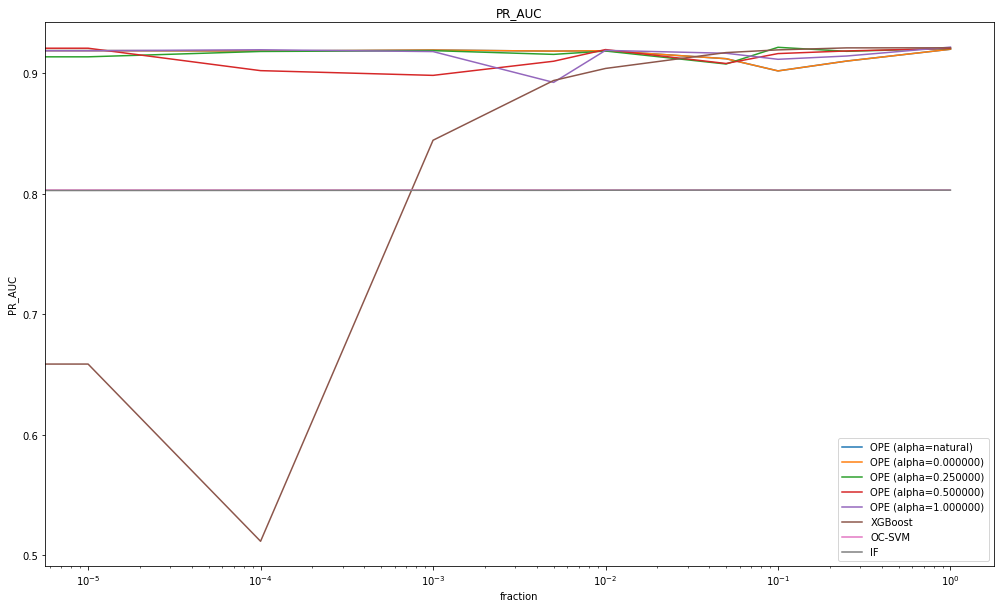

In [92]:
metric = 'PR_AUC'
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(fractions, [x[0][metric] for x in metrics_dict['OPE']], label='OPE (alpha=natural)')
for i, alpha in enumerate(alphas_grid[1:]):
    ax.plot(fractions, [x[i][metric] for x in metrics_dict['OPE']], label='OPE (alpha=%f)' % alpha)

for algo_name in ['XGBoost', 'OC-SVM', 'IF']:
    ax.plot(fractions, [x[metric] for x in metrics_dict[algo_name]], label=algo_name)

ax.set_xscale('log')
ax.set_xlabel('fraction')
ax.set_ylabel(metric)
ax.set_title(metric)
ax.legend()

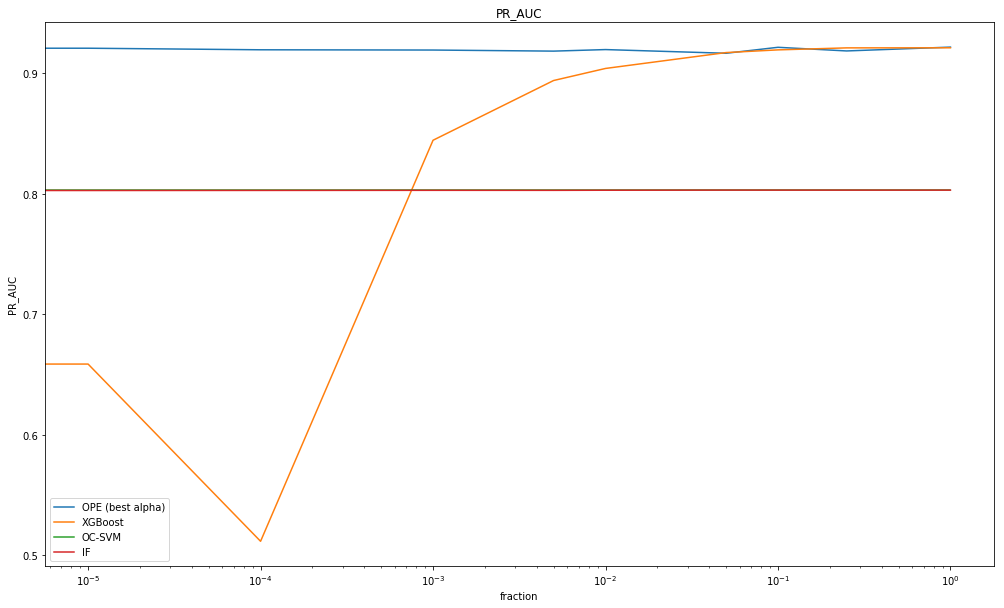

In [94]:
metric = 'PR_AUC'
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(fractions, [max([y[metric] for y in x]) for x in metrics_dict['OPE']], label='OPE (best alpha)')

for algo_name in ['XGBoost', 'OC-SVM', 'IF']:
    ax.plot(fractions, [x[metric] for x in metrics_dict[algo_name]], label=algo_name)

ax.set_xscale('log')
ax.set_xlabel('fraction')
ax.set_ylabel(metric)
ax.set_title(metric)
ax.legend()

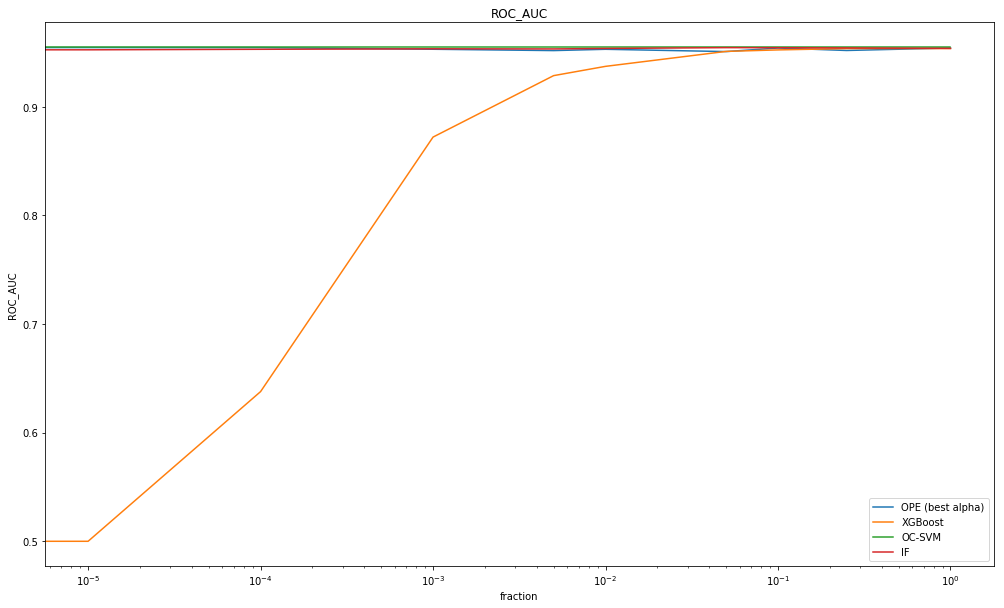

In [95]:
metric = 'ROC_AUC'
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(fractions, [max([y[metric] for y in x]) for x in metrics_dict['OPE']], label='OPE (best alpha)')

for algo_name in ['XGBoost', 'OC-SVM', 'IF']:
    ax.plot(fractions, [x[metric] for x in metrics_dict[algo_name]], label=algo_name)

ax.set_xscale('log')
ax.set_xlabel('fraction')
ax.set_ylabel(metric)
ax.set_title(metric)
ax.legend()

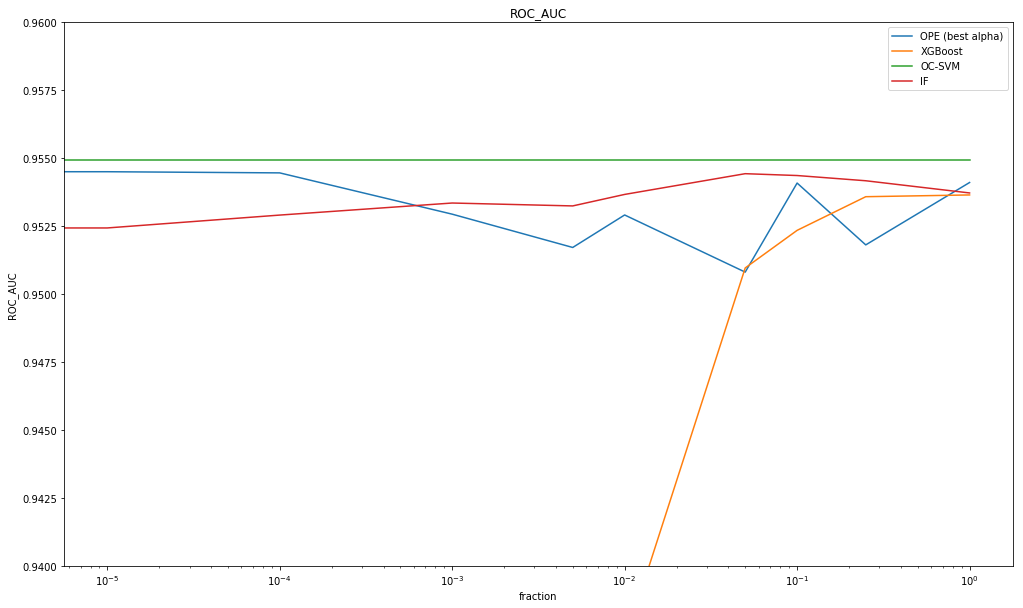

In [98]:
metric = 'ROC_AUC'
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(fractions, [max([y[metric] for y in x]) for x in metrics_dict['OPE']], label='OPE (best alpha)')

for algo_name in ['XGBoost', 'OC-SVM', 'IF']:
    ax.plot(fractions, [x[metric] for x in metrics_dict[algo_name]], label=algo_name)

ax.set_ylim((0.94, 0.96))
ax.set_xscale('log')
ax.set_xlabel('fraction')
ax.set_ylabel(metric)
ax.set_title(metric)
ax.legend()

In [101]:
periods = [0, 3, 4, 5]

def generate(n=40240, periods=4, coef=0.5):
    ### original dataset
    x = np.random.normal(size=(n, 2))
    r = np.sqrt(x[:, 0] ** 2 + x[:, 1] ** 2)

    y = np.random.binomial(1, p=1 - np.minimum(np.maximum(r - 1, 0), 1))
    
    ### periods = 0 correspond to the original problem
    if periods == 0:
        return x, y
    
    theta = np.arctan2(x[:, 1], x[:, 0])
    
    r *= (1 + (np.cos(theta * periods) + 1) * coef / 2)
    
    return np.vstack([
        r * np.cos(theta),
        r * np.sin(theta)
    ]).T, y

evaluations = []

for period in periods:
    X_data, labels = generate(periods=period)

    from sklearn.model_selection import train_test_split
    import numpy as np
    indx_train, indx_test = train_test_split(np.arange(len(labels), dtype='int32'), stratify=labels, train_size=0.5, test_size=0.5)

    y_train = labels[indx_train]
    y_test = labels[indx_test]

    X_train = X_data[indx_train]
    X_test = X_data[indx_test]

    X_good = X_train[np.where(y_train==0)[0]]
    X_bad = X_train[np.where(y_train==1)[0]]
    
    metrics_dict = {'XGBoost': [], 'OPE': [], 'OC-SVM': [], 'IF': []}

    for fraction in tqdm(fractions):
        CONTAMINATION = fraction
        bad_cnt = int(CONTAMINATION * X_good.shape[0])
        X_mix = np.vstack([X_train[y_train == 0], X_train[y_train == 1][:bad_cnt]])
        y_mix = np.concatenate([np.zeros_like(y_train[y_train == 0]), np.ones_like(y_train[y_train == 1][:bad_cnt])])
        shuffled_idx = np.arange(X_mix.shape[0])
        np.random.shuffle(shuffled_idx)
        X_mix, y_mix = X_mix[shuffled_idx], y_mix[shuffled_idx]



        clf = xgb.XGBClassifier(n_estimators=1000, learning_rate=1e-2)
        clf.fit(X_mix, y_mix)
        y_pred = clf.predict_proba(X_test)[:, 1]
        metrics_dict['XGBoost'].append(get_anomaly_metrics(y_test, y_pred))

        clf = svm.OneClassSVM(nu=0.03, kernel="rbf", gamma=1e-5)
        clf.fit(X_good) # OC-SVM is for novelty recognition
        y_pred = clf.decision_function(X_test).squeeze()
        metrics_dict['OC-SVM'].append(get_anomaly_metrics(y_test, y_pred))

        clf = IsolationForest(n_estimators=500, contamination=CONTAMINATION,random_state=10) # IF is for anomaly detection
        clf.fit(X_mix)
        y_pred = clf.decision_function(X_test).squeeze()
        metrics_dict['IF'].append(get_anomaly_metrics(y_test, y_pred))

        metrics_ope = []
        for alpha in alphas_grid:
            clf = OPE(pseudo_neg_size=10000, batch_size=10000, alpha=alpha, verbose=0, 
                      epoches=100, lr=5e-4, hidden_layer_size=50)
            clf.fit(X_mix, y_mix)
            y_pred = clf.predict_proba(X_test)
            metrics_ope.append(get_anomaly_metrics(y_test, y_pred[:, 1]))
        metrics_dict['OPE'].append(metrics_ope)
    
    evaluations.append(metrics_dict)


  0%|          | 0/10 [00:00<?, ?it/s]
Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/aryzhikov/.conda/envs/lasagne2.7/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/home/aryzhikov/.conda/envs/lasagne2.7/lib/python2.7/site-packages/tqdm/_monitor.py", line 63, in run
    for instance in self.tqdm_cls._instances:
  File "/home/aryzhikov/.conda/envs/lasagne2.7/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration


100%|██████████| 10/10 [39:13<00:00, 235.36s/it]


In [103]:
import json
with open('evaluations_30.05.2018.json', 'w') as f:
    f.write(json.dumps(evaluations, indent=4, sort_keys=False))

In [146]:
def gen_and_plot(ax, n=32 * 1024, periods=4, coef=0.5):
    x, y = generate(n=n, periods=periods, coef=coef)

    ax.scatter(x[y == 1, 0], x[y == 1, 1], color='green', alpha=1024.0 / n, label='good')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], color='red', alpha=1024.0 / n, label='anomaly')
    ax.set_ylim([-4, 4])
    ax.set_xlim([-4, 4])
    ax.legend()

def plot_metrics(period_n):
    
    metrics_dict = evaluations[period_n]
    period = periods[period_n]
    
    fig = plt.figure(figsize=(17,15))
    ax = fig.add_subplot(3, 2, 1)
    gen_and_plot(ax, periods=period)
    ax.set_title('Dataset (period=%d)' % period)

    metric = 'PR_AUC' 
    ax = fig.add_subplot(3, 2, 3)
    ax.plot(fractions, [x[0][metric] for x in metrics_dict['OPE']], label='OPE (alpha=natural)')
    for i, alpha in enumerate(alphas_grid[1:]):
        ax.plot(fractions, [x[i][metric] for x in metrics_dict['OPE']], label='OPE (alpha=%f)' % alpha)

    for algo_name in ['XGBoost', 'OC-SVM', 'IF']:
        ax.plot(fractions, [x[metric] for x in metrics_dict[algo_name]], label=algo_name)

    ax.set_xscale('log')
    ax.set_xlabel('fraction')
    ax.set_ylabel(metric)
    ax.set_title(metric)
    ax.legend()

    ax = fig.add_subplot(3, 2, 4)
    ax.plot(fractions, [max([y[metric] for y in x]) for x in metrics_dict['OPE']], label='OPE (best alpha)')

    for algo_name in ['XGBoost', 'OC-SVM', 'IF']:
        ax.plot(fractions, [x[metric] for x in metrics_dict[algo_name]], label=algo_name)

    ax.set_ylim((0.9, 1.0))
    ax.set_xscale('log')
    ax.set_xlabel('fraction')
    ax.set_ylabel(metric)
    ax.set_title(metric)
    ax.legend()

    metric = 'ROC_AUC'
    ax = fig.add_subplot(3, 2, 5)
    ax.plot(fractions, [max([y[metric] for y in x]) for x in metrics_dict['OPE']], label='OPE (best alpha)')

    for algo_name in ['XGBoost', 'OC-SVM', 'IF']:
        ax.plot(fractions, [x[metric] for x in metrics_dict[algo_name]], label=algo_name)

    # ax.set_ylim((0.9, 1.0))
    ax.set_xscale('log')
    ax.set_xlabel('fraction')
    ax.set_ylabel(metric)
    ax.set_title(metric)
    ax.legend()

    ax = fig.add_subplot(3, 2, 6)
    ax.plot(fractions, [max([y[metric] for y in x]) for x in metrics_dict['OPE']], label='OPE (best alpha)')

    for algo_name in ['XGBoost', 'OC-SVM', 'IF']:
        ax.plot(fractions, [x[metric] for x in metrics_dict[algo_name]], label=algo_name)

    ax.set_ylim((0.9, 1.0))
    ax.set_xscale('log')
    ax.set_xlabel('fraction')
    ax.set_ylabel(metric)
    ax.set_title(metric)
    ax.legend()
    fig.tight_layout()

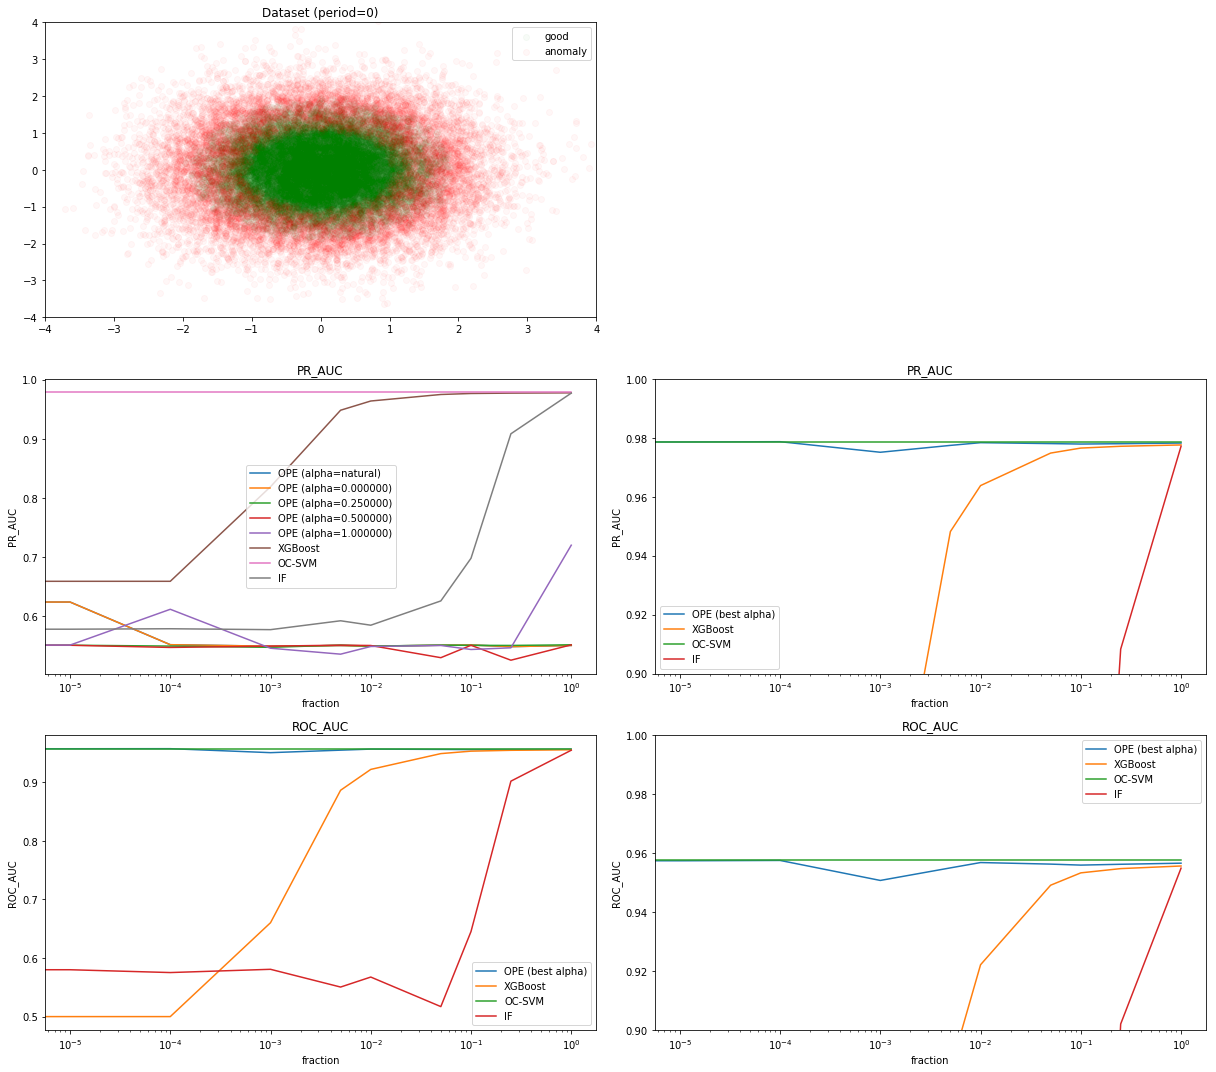

In [147]:
plot_metrics(period_n=0)

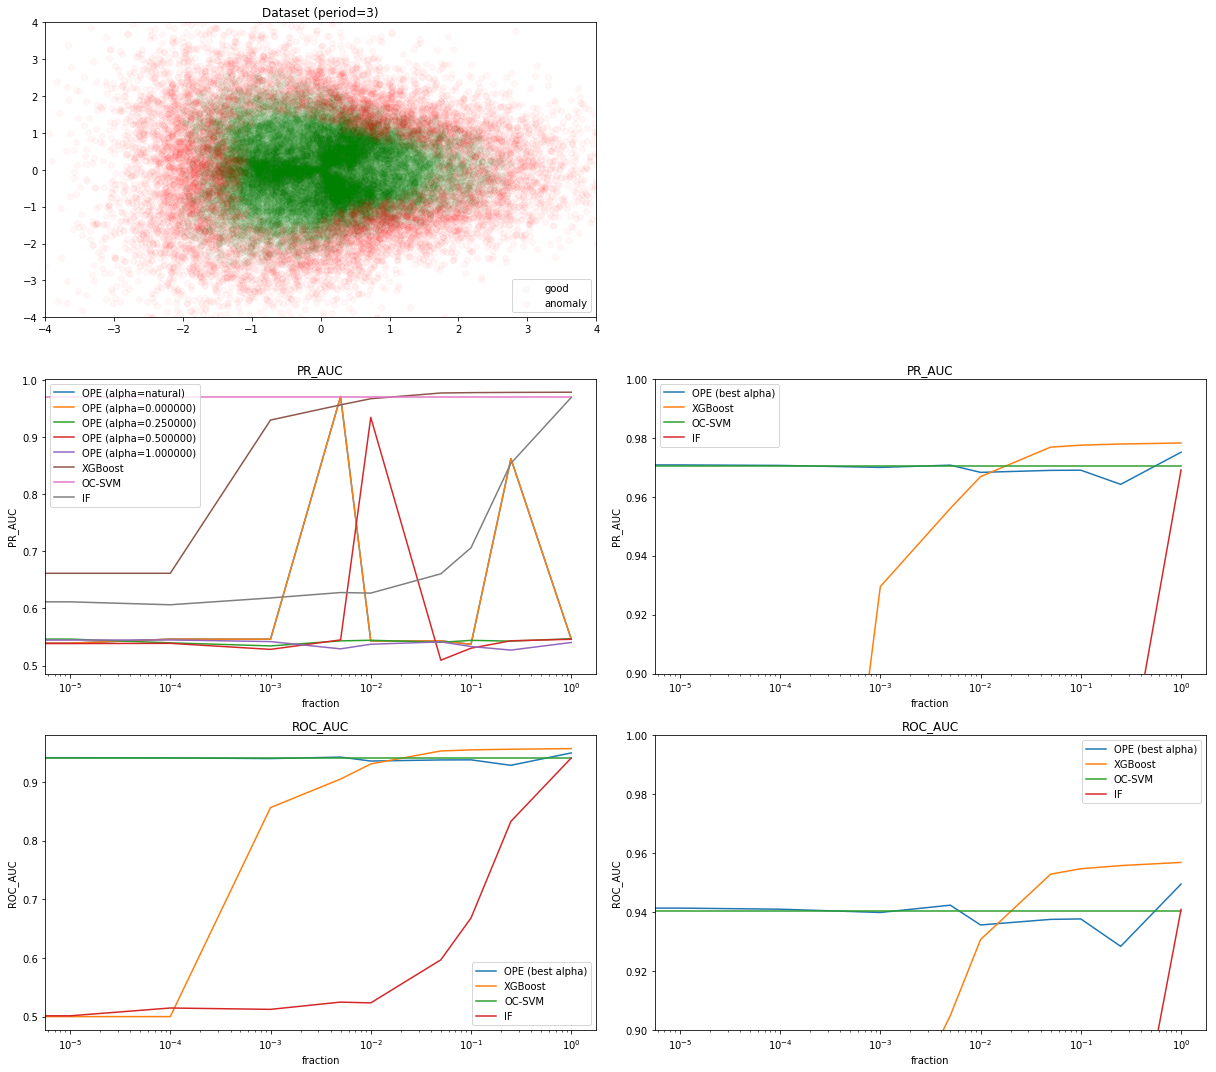

In [148]:
plot_metrics(period_n=1)

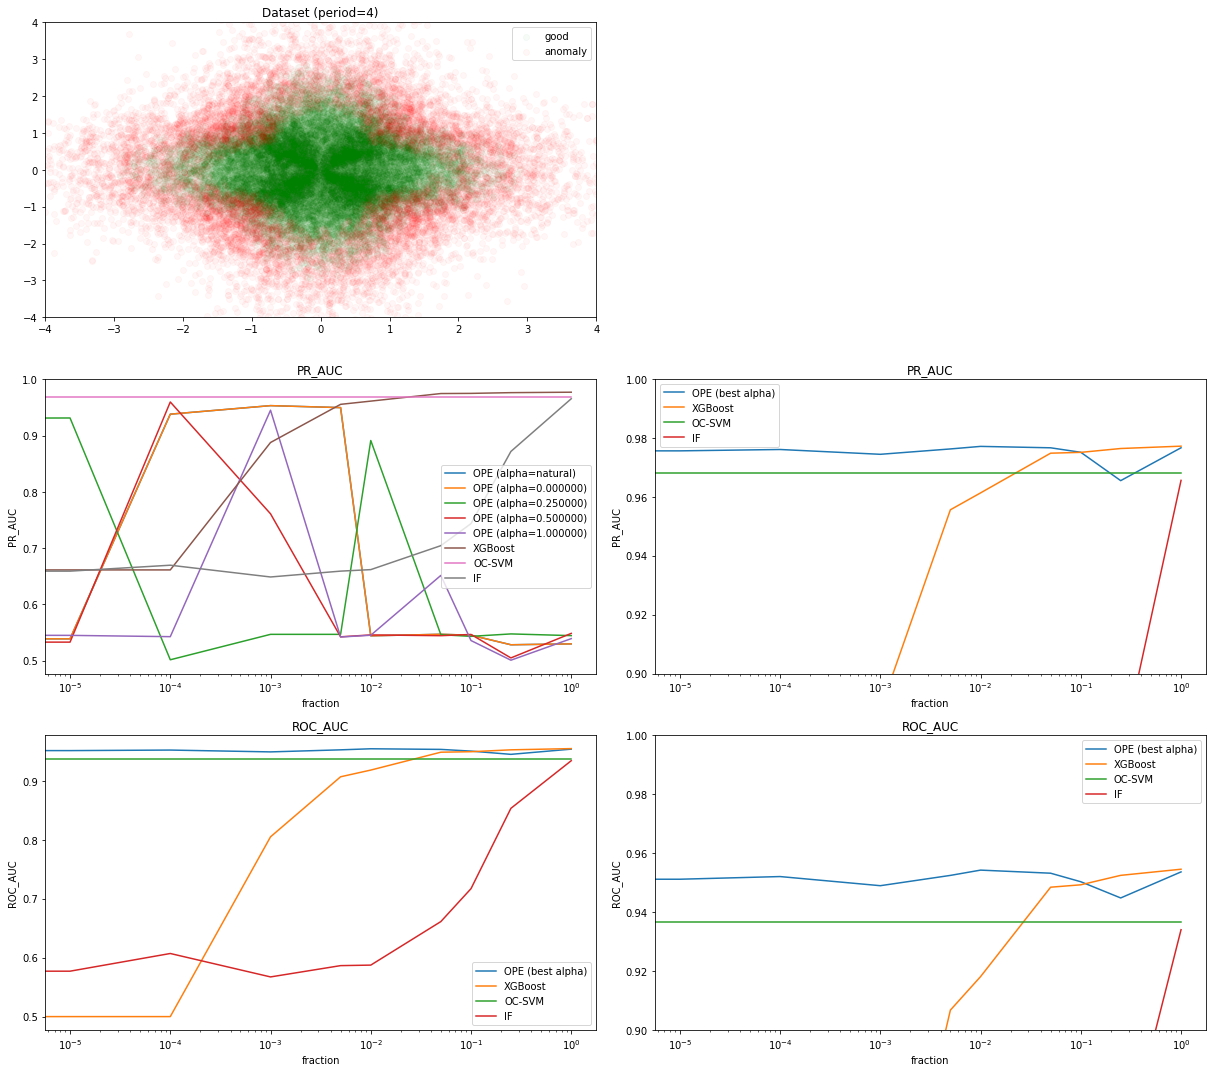

In [149]:
plot_metrics(period_n=2)

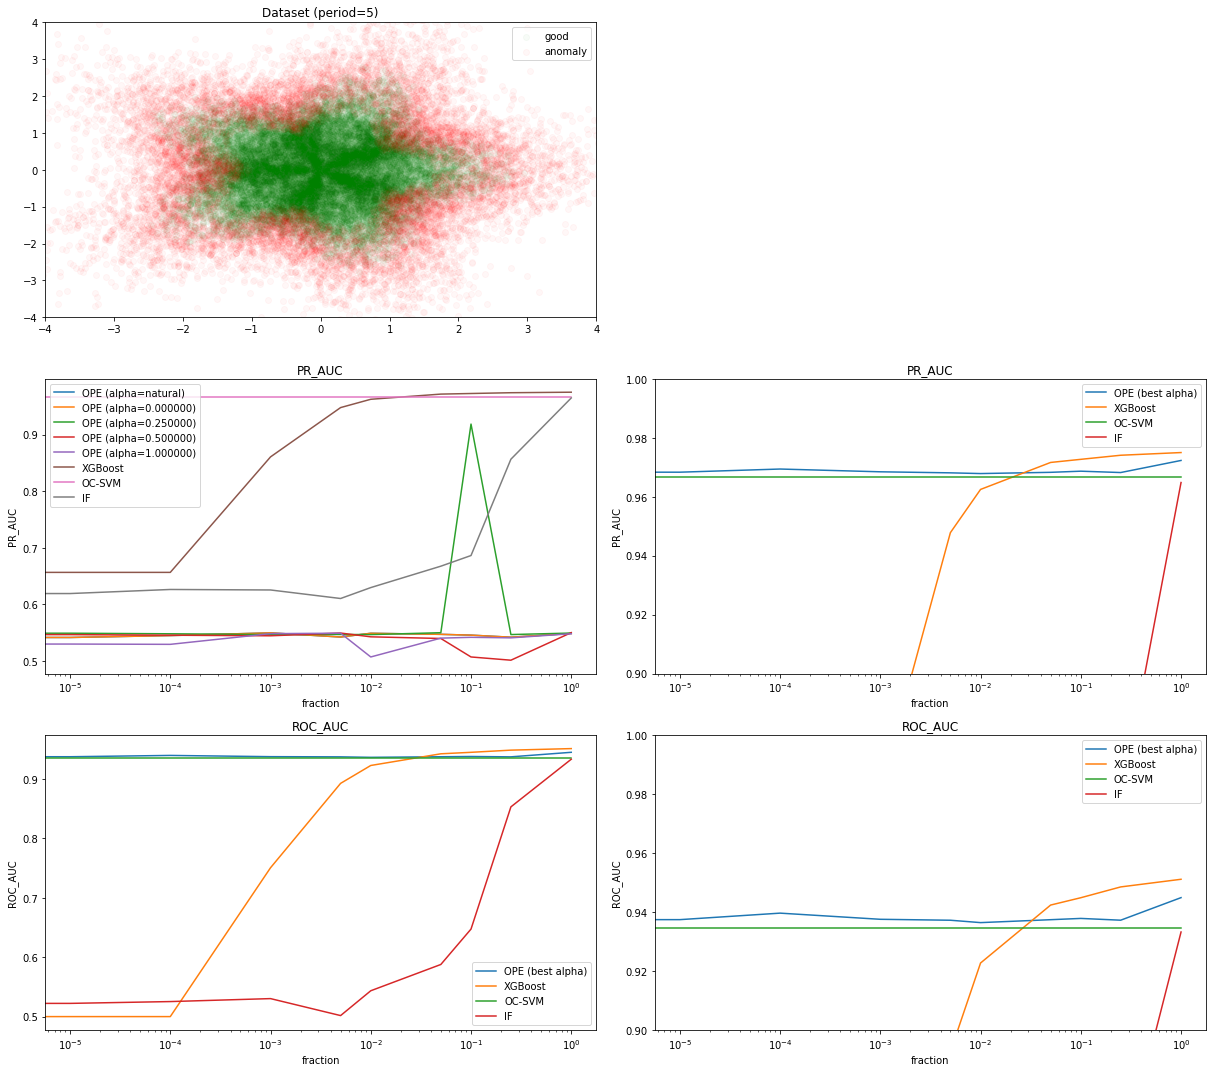

In [150]:
plot_metrics(period_n=3)